# Análisis Exploratorio de Datos

En este notebook se realizá un análisis exploratorio de los datos del dataset [Beijing Multi-Site Air-Quality Dataset][kaggle] de Kaggle


[kaggle]: https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set
#### **Información del Dataset**
Este conjunto de datos incluye contiene información de contaminantes atmosféricos por hora, de 12 sitios de monitoreo de la calidad del aire controlados a nivel nacional en China. Los datos de calidad del aire son del Centro Municipal de Monitoreo Ambiental de Beijing. Los datos meteorológicos en cada sitio de calidad del aire se combinan con la estación meteorológica más cercana de la Administración Meteorológica de China.


#### **Objetivos**

- Descripción de las columnas del dataset
- Estructura de Datos
- Distribución y Visualización entre Variables


### Importación de Librerías


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargando el Dataset


In [2]:
ruta = '../data/PRSA_Data_Aotizhongxin.csv'
df = pd.read_csv(ruta)

### Dimensión del Dataset (Filas, Columnas)

In [3]:
print("Filas:",df.shape[0])
print("Columnas:",df.shape[1])

Filas: 35064
Columnas: 18


### Inspección Inicial del Dataset
#### Distinción entre Variables Númericas y Categoricas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Resumen Estadístico

In [5]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Estructura del Conjunto de Datos
#### Características
1. **No**: Identificador único para cada entrada.
2. **Year**: Variable temporal que indica el año de la medición.
3. **Month**: Variable temporal que indica el mes de la medición.
4. **Day**: Variable temporal que indica el día de la medición.
5. **Hour**: Variable temporal que indica la hora de la medición.
6. **PM2.5**: Concentración de partículas finas en el aire (partículas de diámetro ≤ 2.5 micras).
7. **PM10**: Concentración de partículas de mayor tamaño (diámetro ≤ 10 micras).
8. **SO2**: Concentración de dióxido de azufre.
9. **NO2**: Concentración de dióxido de nitrógeno.
10. **CO**: Concentración de monóxido de carbono.
11. **O3**: Concentración de ozono.
12. **TEMP**: Temperatura en grados Celsius.
13. **PRES**: Presión atmosférica en hectopascales.
14. **DEWP**: Punto de rocío en grados Celsius.
15. **RAIN**: Cantidad de precipitación.
16. **wd**: Dirección del viento.
17. **WSPM**: Velocidad del viento en metros por segundo.
18. **Station**: Nombre de la estación de monitoreo.

#### Atributos Categóricos:
- wd
- station

#### Atributos Númericos:
- No
- Year, month, day, hour
- PM2.5, PM10
- SO2, NO2, CO, O3
- TEMP
- PRES
- DEWP
- RAIN
- WSPM

### Primeras 10 Filas del Dataset

In [6]:
df.head(10) 

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


### Distribución y Visualización de Variables

Antes de aplicar cualquier transformación, es importante entender cómo se distribuyen las variables en su estado original. Esto nos ayuda a detectar asimetrías, outliers o los tipos de distribuciones si son normales, uniformes o bimodales.

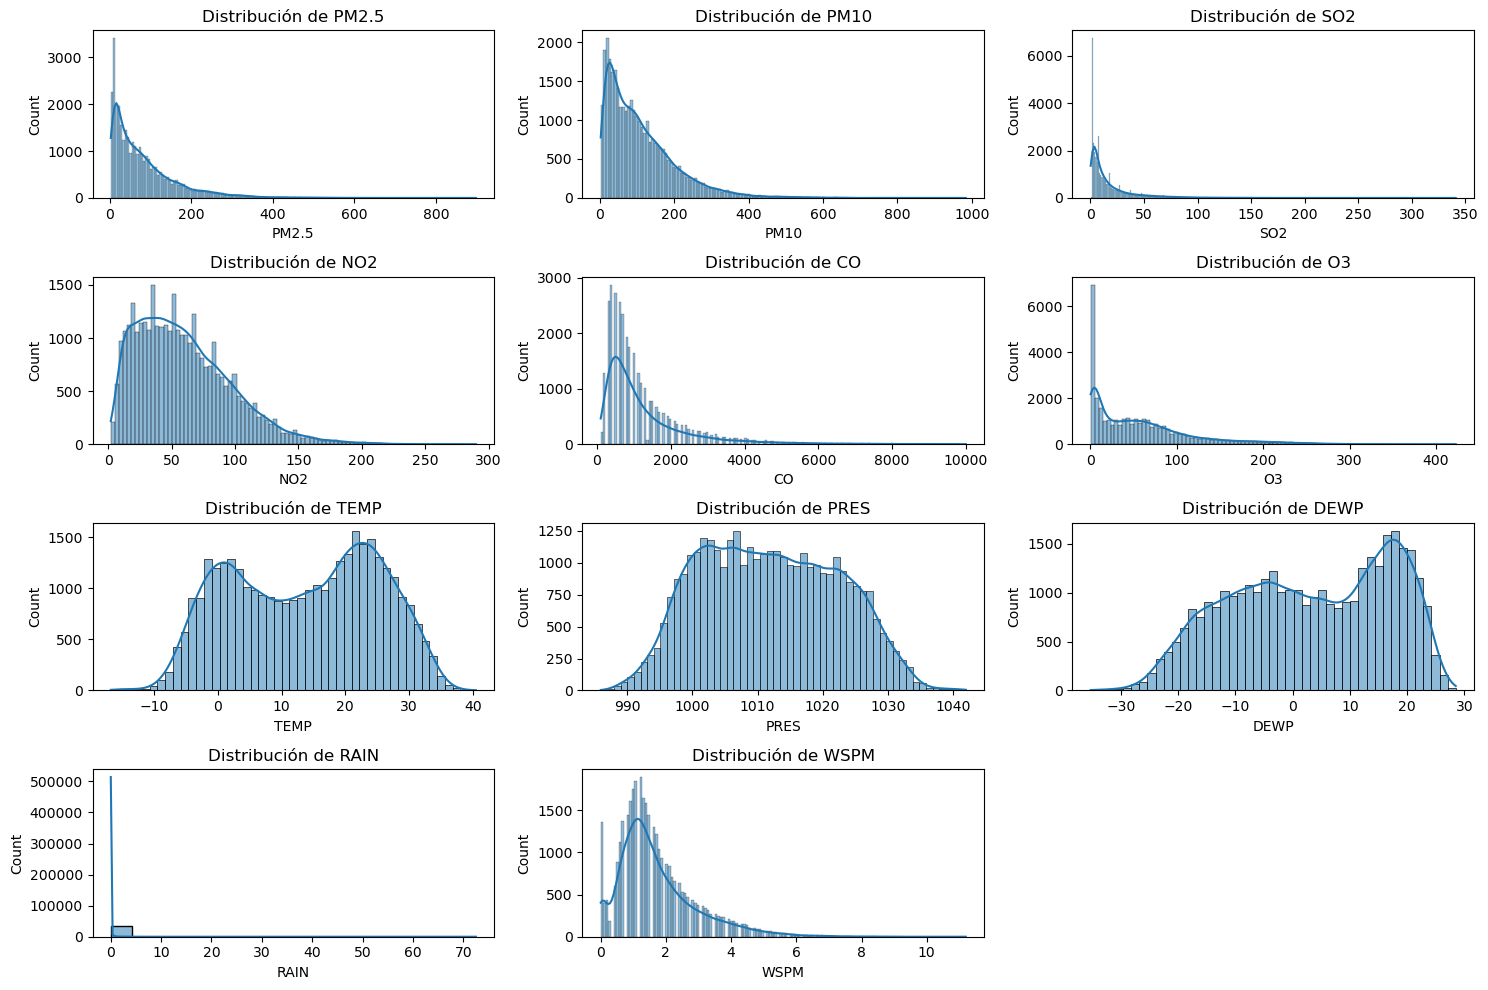

In [15]:
# Distribución de variables numéricas
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

### Visualización de Series Temporales

#### Verificación de Columnas

In [27]:
print(df.columns) 
print(df[['year', 'month', 'day', 'hour']].isnull().sum())  # Para ver si hay valores nulos

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
year     0
month    0
day      0
hour     0
dtype: int64


#### Creación de Columna Datatime

In [28]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

#### Configurar 'Datetime' como índice del DataFrame

In [24]:
df.set_index('datetime', inplace=True)

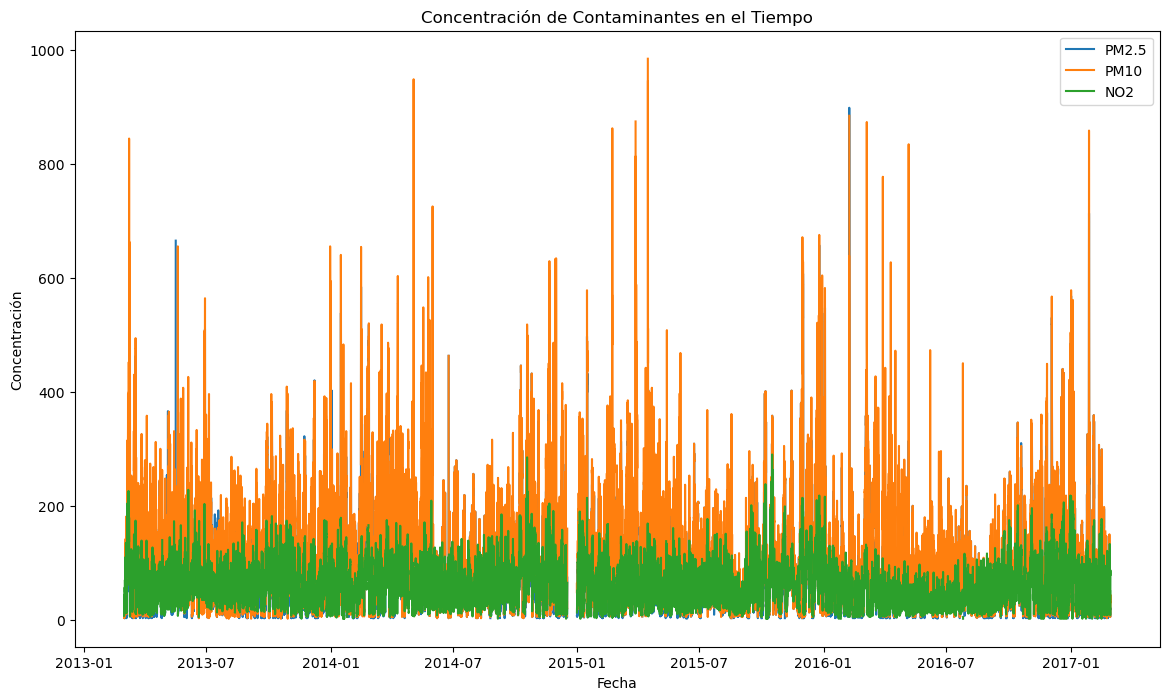

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['PM2.5'], label='PM2.5')
plt.plot(df.index, df['PM10'], label='PM10')
plt.plot(df.index, df['NO2'], label='NO2')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.title('Concentración de Contaminantes en el Tiempo')
plt.legend()
plt.show()

### Matriz de Correlación entre Variables Numéricas

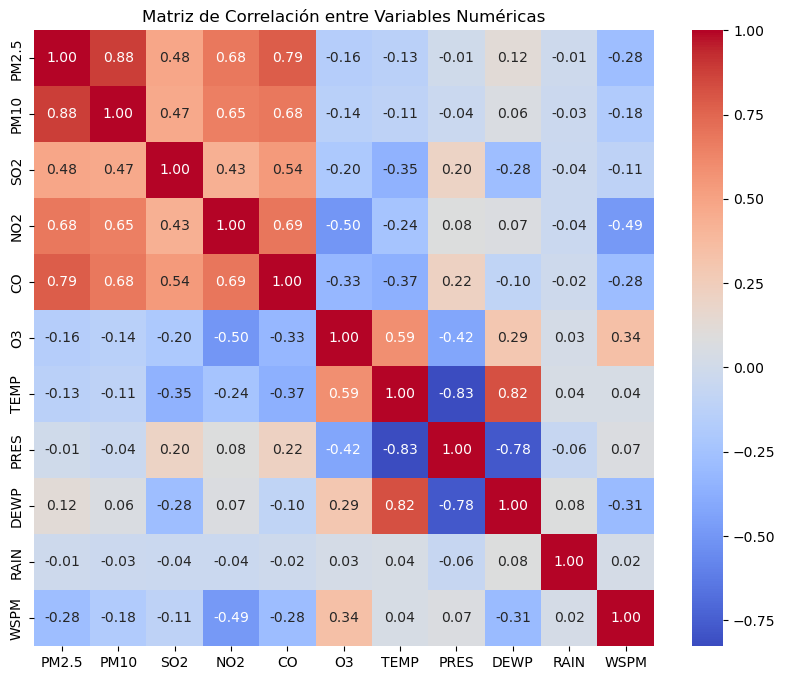

In [26]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Conclusiones del Análisis Exploratorio de Datos

#### 1. Distribución de Variables Numéricas
En la visualización de la **distribución de las variables numéricas**:
- Las variables **PM2.5**, **PM10**, **SO2**, **NO2**, y **CO** presentan distribuciones sesgadas hacia la izquierda, con valores de concentración que tienden a estar en el rango bajo, pero con algunos valores extremos (outliers) que indican episodios de alta contaminación.
- Las variables meteorológicas, como **TEMP** (temperatura) y **PRES** (presión atmosférica), muestran distribuciones más balanceadas. TEMP exhibe un patrón bimodal que podría reflejar la variación estacional de temperaturas en Beijing.
- La variable **RAIN** tiene una distribución fuertemente sesgada hacia la izquierda, sugiriendo que las precipitaciones son poco frecuentes en el periodo de muestreo, con solo algunos episodios significativos.

#### 2. Variación Temporal de Contaminantes
En el gráfico de **variación temporal** de los principales contaminantes (**PM2.5**, **PM10**, **NO2**), se observan picos en ciertos periodos, lo cual podría estar asociado a factores estacionales, condiciones meteorológicas o actividades humanas específicas. La concentración de **PM10** parece mostrar los valores más altos en general, mientras que **NO2** tiene niveles más moderados en comparación con los otros contaminantes.

#### 3. Correlación entre Variables Numéricas
La **matriz de correlación** muestra las relaciones entre variables numéricas:
- Existe una alta correlación positiva entre **PM2.5** y **PM10** (0.88), lo que indica que ambas partículas finas tienden a aumentar y disminuir en conjunto, posiblemente debido a fuentes comunes de contaminación o condiciones atmosféricas similares.
- **CO** también tiene una correlación moderada con **PM2.5** (0.79) y **PM10** (0.68), sugiriendo que podría compartir algunas fuentes con estas partículas.
- Entre las variables meteorológicas, **TEMP** y **DEWP** muestran una correlación positiva fuerte (0.82), mientras que **TEMP** y **PRES** presentan una correlación negativa (-0.83), lo cual es consistente con la relación inversa habitual entre temperatura y presión.

Este análisis exploratorio inicial ayuda a identificar patrones y relaciones entre las variables, proporcionando una base sólida para el preprocesamiento y modelado posterior.
